In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

invoices = pd.read_csv("fct_invoice.csv")
customers = pd.read_json("dim_customer.json")

print("Invoices:")
print(invoices.head(), "\n")

print("Customers:")
print(customers.head())


Invoices:
  invoice_no  customer_id  category  quantity    price payment_method  \
0    I138884          229  Clothing         5  1500.40    Credit Card   
1    I317333         3433     Shoes         3  1800.51     Debit Card   
2    I127801          644  Clothing         1   300.08           Cash   
3    I173702         4900     Shoes         5  3000.85    Credit Card   
4    I337046         1089     Books         4    60.60           Cash   

  invoice_date   shopping_mall  
0     5/8/2022          Kanyon  
1   12/12/2021  Forum Istanbul  
2    9/11/2021       Metrocity  
3   16/05/2021    Metropol AVM  
4   24/10/2021          Kanyon   

Customers:
    age first_name gender  id last_name
0  48.0   Nicholas      M   0    Flores
1   NaN    Jeffery      M   1      Rowe
2  57.0     Alexis      F   2    Benton
3  73.0        Amy      F   3   Johnson
4  20.0      David      M   4     Moore


In [2]:
unique_customers = invoices['customer_id'].nunique()
unique_customers

5191

In [3]:
categories = invoices['category'].unique()
num_categories = len(categories)
categories, num_categories

(array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
        'Toys', 'Technology', 'Souvenir'], dtype=object),
 8)

In [4]:
most_used_payment_method = invoices['payment_method'].value_counts().idxmax()
usage_count = invoices['payment_method'].value_counts().max()
most_used_payment_method, usage_count

('Cash', 44447)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

invoices = pd.read_csv("fct_invoice.csv")
customers = pd.read_json("dim_customer.json")

print("Invoices sample:")
print(invoices.head())

print("\nCustomers sample:")
print(customers.head())


Invoices sample:
  invoice_no  customer_id  category  quantity    price payment_method  \
0    I138884          229  Clothing         5  1500.40    Credit Card   
1    I317333         3433     Shoes         3  1800.51     Debit Card   
2    I127801          644  Clothing         1   300.08           Cash   
3    I173702         4900     Shoes         5  3000.85    Credit Card   
4    I337046         1089     Books         4    60.60           Cash   

  invoice_date   shopping_mall  
0     5/8/2022          Kanyon  
1   12/12/2021  Forum Istanbul  
2    9/11/2021       Metrocity  
3   16/05/2021    Metropol AVM  
4   24/10/2021          Kanyon  

Customers sample:
    age first_name gender  id last_name
0  48.0   Nicholas      M   0    Flores
1   NaN    Jeffery      M   1      Rowe
2  57.0     Alexis      F   2    Benton
3  73.0        Amy      F   3   Johnson
4  20.0      David      M   4     Moore


In [4]:
invoices['total_sales'] = invoices['quantity'] * invoices['price']
top_categories = invoices.groupby('category')['total_sales'].sum().sort_values(ascending=False).head(3)
print("Top Three(3) categories by total sales:")
print(top_categories)

Top Three(3) categories by total sales:
category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64


In [5]:
merged = pd.merge(invoices, customers, left_on='customer_id', right_on='id')

filtered = merged[merged['age'] > 45]

total_sales_over_45 = (filtered['quantity'] * filtered['price']).sum()

print(f"Total sales from customers over age 45: {total_sales_over_45:.2f}")


Total sales from customers over age 45: 82039768.15


In [7]:
invoices['invoice_date'] = pd.to_datetime(invoices['invoice_date'])

invoices['date_only'] = invoices['invoice_date'].dt.date

daily_sales = invoices.groupby('date_only')['total_sales'].sum()

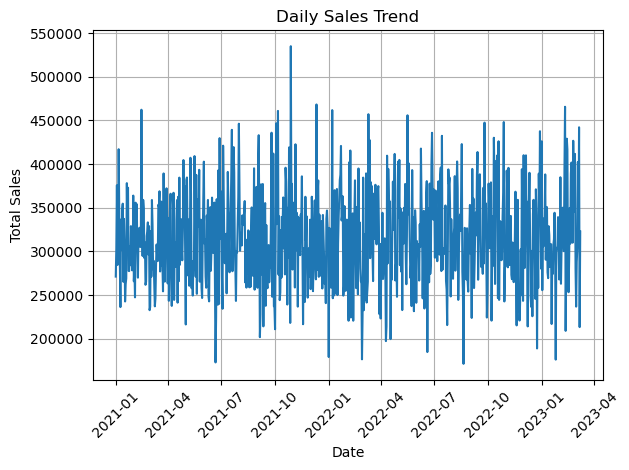

In [8]:
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Merge the invoice and customer data
merged = pd.merge(invoices, customers, left_on='customer_id', right_on='id')

# Remove rows where age is missing
merged = merged[merged['age'].notnull()]

# Make a new column for age groups by decade
age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
merged['age_group'] = pd.cut(merged['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate total sales for each row
merged['total_sales'] = merged['quantity'] * merged['price']

# Group by category and age group, and sum total sales
pivot = merged.groupby(['category', 'age_group'])['total_sales'].sum().unstack(fill_value=0)

# Show the pivot table
print(pivot)


age_group             10-19        20-29        30-39        40-49  \
category                                                             
Books              12801.75     79461.75     84143.10     87203.40   
Clothing         1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics         109619.36    605915.32    723544.70    665034.96   
Food & Beverage    13582.31     73491.96     87246.86     89553.29   
Shoes             993281.35   5924878.24   7200839.66   7025590.02   
Souvenir           12375.15     54943.32     64092.72     66391.80   
Technology       1129800.00   5261550.00   6159300.00   5954550.00   
Toys               60426.24    385100.80    420582.40    390906.88   

age_group              50-59        60-69       70-79       80-89  
category                                                           
Books               74962.20     80476.80    54827.85    26664.00  
Clothing         10321851.76  10660642.08  7769371.28  4493698.00  
Cosmetics          587780.9

C:\Users\drbig\AppData\Local\Temp\ipykernel_27568\3487531424.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = merged.groupby(['category', 'age_group'])['total_sales'].sum().unstack(fill_value=0)
